In [ ]:
import os
datadir_train = r"datasets\semeval2017\train\train2"
datadir_train_abs = r"D:\mytsinghua\nlp\KeyPhrase_Extraction\datasets\semeval2017\test\semeval_articles_test"
datadir_test = r"datasets\semeval2017\test\semeval_articles_test"


In [ ]:
def fileNames(root, suffix=None):
    
    if not os.path.isabs(root):
        root = os.path.join(os.getcwd(),root)
    names = os.listdir(root)
    result = []
    if suffix:
        for name in names:
            if os.path.splitext(name)[1] == suffix:
                result.append(os.path.splitext(name)[0])
    else:
        result = names
    return result

In [ ]:
alldata = fileNames(datadir_train,'.txt')

In [16]:
from transformers import RobertaTokenizerFast,RobertaTokenizer,BertTokenizer,BertForMaskedLM


In [177]:
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base",add_prefix_space=True)

In [178]:
tokenizer2 = RobertaTokenizer.from_pretrained("roberta-base",add_prefix_space=True)

In [7]:
tokenizer3 = BertTokenizer.from_pretrained("bert-base-uncased",add_prefix_space=True)

In [18]:
model = BertForMaskedLM.from_pretrained(
            "bert-base-uncased",
            return_dict = False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained("bert-base-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)
help(model)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
help(model)

Help on BertModel in module transformers.models.bert.modeling_bert object:

class BertModel(BertPreTrainedModel)
 |  BertModel(config, add_pooling_layer=True)
 |  
 |  The bare Bert Model transformer outputting raw hidden-states without any specific head on top.
 |  
 |  This model inherits from :class:`~transformers.PreTrainedModel`. Check the superclass documentation for the generic
 |  methods the library implements for all its model (such as downloading or saving, resizing the input embeddings,
 |  pruning heads etc.)
 |  
 |  This model is also a PyTorch `torch.nn.Module <https://pytorch.org/docs/stable/nn.html#torch.nn.Module>`__
 |  subclass. Use it as a regular PyTorch Module and refer to the PyTorch documentation for all matter related to
 |  general usage and behavior.
 |  
 |  Parameters:
 |      config (:class:`~transformers.BertConfig`): Model configuration class with all the parameters of the model.
 |          Initializing with a config file does not load the weights ass

In [27]:
output[0].shape

torch.Size([1, 12, 30522])

In [14]:
tokenizer3('hello.')
tokenizer3.decode([18351,])

'##word'

In [213]:
t = "ObjectiveElectrically evoked auditory steady-state responses (EASSRs) are neural potentials measured in the electroencephalogram (EEG) in response to periodic pulse trains presented, for example, through a cochlear implant (CI). EASSRs could potentially be used for objective CI fitting. However, EEG signals are contaminated with electrical CI artifacts. In this paper, we characterized the CI artifacts for monopolar mode stimulation and evaluated at which pulse rate, linear interpolation over the signal part contaminated with CI artifact is successful.MethodsCI artifacts were characterized by means of their amplitude growth functions and duration.ResultsCI artifact durations were between 0.7 and 1.7ms, at contralateral recording electrodes. At ipsilateral recording electrodes, CI artifact durations are range from 0.7 to larger than 2ms.ConclusionAt contralateral recording electrodes, the artifact was shorter than the interpulse interval across subjects for 500pps, which was not always the case for 900pps.SignificanceCI artifact-free EASSRs are crucial for reliable CI fitting and neuroscience research. The CI artifact has been characterized and linear interpolation allows to remove it at contralateral recording electrodes for stimulation at 500pps."
start = 9
end = 60
print(t[start-2:end+1])
print("原始数据",tokenizer3(t[start-1:end])["input_ids"])
print(tokenizer3.decode(tokenizer3(t[start:end])["input_ids"]))
print(len(tokenizer3(t[start:end])["input_ids"]))
len1 = len(tokenizer3(t[start:end])["input_ids"])
print("前置数据",tokenizer3(t[0:start])["input_ids"])
print(len(tokenizer3(t[0:start])["input_ids"]))
len2 = len(tokenizer3(t[0:start])["input_ids"])
print("整个句子",tokenizer3(t)["input_ids"])
print(len(tokenizer3(t)["input_ids"]))
print("还原",tokenizer3.decode(tokenizer3(t)["input_ids"][len2-1:len2+len1-3]))
print("还原",tokenizer3(t)["input_ids"][len2-1:len2+len1-3])

veElectrically evoked auditory steady-state responses 
原始数据 [101, 24315, 22471, 14735, 9215, 23408, 23461, 28042, 6706, 1011, 2110, 10960, 102]
[CLS] electrically evoked auditory steady - state responses [SEP]
10
前置数据 [101, 7863, 102]
3
整个句子 [101, 7863, 12260, 22601, 3973, 23408, 23461, 28042, 6706, 1011, 2110, 10960, 1006, 19413, 4757, 2869, 1007, 2024, 15756, 4022, 2015, 7594, 1999, 1996, 16175, 10127, 21890, 24915, 1006, 25212, 2290, 1007, 1999, 3433, 2000, 15861, 8187, 4499, 3591, 1010, 2005, 2742, 1010, 2083, 1037, 2522, 2818, 19738, 2099, 27159, 1006, 25022, 1007, 1012, 19413, 4757, 2869, 2071, 9280, 2022, 2109, 2005, 7863, 25022, 11414, 1012, 2174, 1010, 25212, 2290, 7755, 2024, 19450, 2007, 5992, 25022, 10471, 1012, 1999, 2023, 3259, 1010, 2057, 7356, 1996, 25022, 10471, 2005, 18847, 18155, 2906, 5549, 20858, 1998, 16330, 2012, 2029, 8187, 3446, 1010, 7399, 6970, 18155, 3370, 2058, 1996, 4742, 2112, 19450, 2007, 25022, 20785, 2003, 3144, 1012, 4725, 6895, 10471, 2020, 7356, 201

In [197]:
print(tokenizer3.decode([19382, 8156, 1997, 15415, 3043]))
print(tokenizer3.decode([19382, 8156, 1997, 15415, 4717, 2063]))
tokenizer3.decode([4717, ])

maceration of vegetable matter
maceration of vegetable matte


'matt'

In [130]:
[8201, 2292, 636, 7590, 4]
print(t[966:983][0])
print(tokenizer.decode([24704, 5593, 13871, 2292, 636, 7590, 4]))
print(tokenizer.decode([36]))

r
 manuallyremoving spicule.
 (


In [65]:
with open(r"datasets\semeval2017\test\semeval_articles_test\S2212671612000741.txt", 'r') as file_ann:
    for line in file_ann:
        kp_token = tokenizer(line[91:95])
        print(kp_token)
        kp_token_len = len(kp_token["input_ids"])
        pretoken = tokenizer(line[0:91])
        pretoken_len = len(pretoken["input_ids"])
        keyphrase_ids = list(range(pretoken_len-1,pretoken_len-1+kp_token_len-2))
        sentence_token = tokenizer(line.strip())
        print(keyphrase_ids)
        print([sentence_token["input_ids"][keyphrase_idx] for keyphrase_idx in keyphrase_ids])
        # print(token.word_ids())
        print(sentence_token)
        break

{'input_ids': [0, 530, 5330, 448, 2], 'attention_mask': [1, 1, 1, 1, 1]}
[17, 18, 19]
[530, 5330, 448]
{'input_ids': [0, 250, 3645, 22432, 1421, 716, 15, 2771, 14885, 8, 47139, 19188, 49220, 29830, 9018, 154, 36, 530, 5330, 448, 43, 5448, 16, 1850, 4, 96, 42, 1421, 6, 10, 37015, 36173, 13, 3645, 12432, 154, 16, 4829, 30, 5, 20097, 9, 33900, 11305, 9658, 30, 5, 2771, 14885, 6, 215, 25, 36912, 17505, 6, 46930, 6, 5933, 8, 780, 19830, 6, 4753, 10116, 172, 42, 37015, 36173, 16, 341, 7, 12558, 10, 5163, 36173, 13, 3645, 12432, 154, 131, 1747, 6, 6168, 30759, 5, 3645, 12432, 2963, 30, 229, 5330, 448, 4, 41701, 775, 22827, 14, 84, 1421, 9980, 33334, 81, 5, 26454, 18, 467, 15, 5516, 143, 3505, 9, 3645, 12432, 2963, 6, 19, 389, 207, 746, 3645, 22432, 5849, 731, 20910, 4, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [29]:
keyphrase = []
for filename in alldata:
    keyphrase_single = []
    with open(os.path.join(datadir_train,filename + ".ann"), 'r') as file_ann:
        for line in file_ann:
            pass


In [71]:
import torch
from torch.utils.data import Dataset
from tqdm import tqdm

In [100]:
class semeval2017_dataset(Dataset):
    def __init__(self,tokenizer):
        self.datasetname = "semeval2017"
        self.tokenizer = tokenizer
        self.dataset = []
        self.dataset_len = 0
        
    def __len__(self):
        return len(self.dataset)
    def __getitem__(self,index):
        return self.dataset[index]

    def get_fileNames(self,root, suffix=None):
        if not os.path.isabs(root):
            root = os.path.join(os.getcwd(),root)
        names = os.listdir(root)
        result = []
        if suffix:
            for name in names:
                if os.path.splitext(name)[1] == suffix:
                    result.append(os.path.splitext(name)[0])
        else:
            result = names
        return result
    def load_data_from(self,datadir):
        self.filenames = self.get_fileNames(datadir,".txt")
        self.dataset_len = len(self.filenames)
        origin_data={}
        origin_data["text"]=[]
        origin_data["keyphrase"]=[]
        flict_pos_num = 0
        for filename in tqdm(self.filenames):
            with open(os.path.join(datadir,filename+".txt"), 'r',encoding='utf-8') as file_txt:
                for line in file_txt:
                    origin_data["text"].append(line.strip())
                    break
            with open(os.path.join(datadir,filename+".ann"), 'r',encoding='utf-8') as file_ann:
                keyphrase_single = []
                for line in file_ann:
                    line = line.strip().split("\t")
                    keyphrase_single.append(line)
                origin_data["keyphrase"].append(keyphrase_single)
        assert self.dataset_len == len(origin_data["text"]) == len( origin_data["keyphrase"]) , "lengths are not same."
        for i in tqdm(range(self.dataset_len)):
            text = origin_data["text"][i]
            keyphrases = origin_data["keyphrase"][i]
            text_token = tokenizer(text)
            text_len = len(text_token["input_ids"])
            keyphrase_pos = []
            for keyphrase in keyphrases:
                # 暂且只考虑T的关键词，且不考虑分类
                if keyphrase[0][0] is not 'T': 
                    continue
                tmp = keyphrase[1].split(" ")
                keyphrase_type,start,end = tmp[0], int(tmp[1]), int(tmp[2])
                pretoken = self.tokenizer(text[0:start])
                pretoken_len = len(pretoken["input_ids"])
                kp_token = self.tokenizer(text[start:end])
                kp_token_len = len(kp_token["input_ids"])
                pos = [text_token["input_ids"][keyphrase_idx] for keyphrase_idx in range(pretoken_len-1,pretoken_len-1+kp_token_len-2)]
                keyphrase_pos.append(pos)

            pos_label = [0] * text_len
            
            for pos_group in keyphrase_pos: 
                for pos in pos_group: 
                    if pos_label[pos] == 1: 
                        flict_pos_num += 1
                    else:
                        pos_label[pos]=1
            text_token['labels'] = pos_label
            self.dataset.append(text_token)


            
            
                            

In [101]:
dataset = semeval2017_dataset(tokenizer)
print(dataset)
dataset.load_data_from(datadir_test)

  0%|          | 0/100 [00:00<?, ?it/s]


IndexError: list index out of range

In [5]:
template_path = r"datasets\semeval2017\templates.txt"
with open(template_path,'r',encoding='utf-8') as f: 
    templates = [line.strip().split() for line in f]
    template = templates[0]
template

['The', 'keyword', 'is', '<mask>', '.', '<text>']

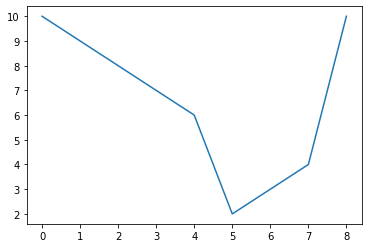

In [33]:
import numpy as np
import matplotlib.pyplot as plt
loss = [10,9,8,7,6,2,3,4,10]

plt.plot(loss)

In [34]:
import torch
criterion = torch.nn.CrossEntropyLoss()
help(criterion)

Help on CrossEntropyLoss in module torch.nn.modules.loss object:

class CrossEntropyLoss(_WeightedLoss)
 |  CrossEntropyLoss(weight: Union[torch.Tensor, NoneType] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean') -> None
 |  
 |  This criterion combines :class:`~torch.nn.LogSoftmax` and :class:`~torch.nn.NLLLoss` in one single class.
 |  
 |  It is useful when training a classification problem with `C` classes.
 |  If provided, the optional argument :attr:`weight` should be a 1D `Tensor`
 |  assigning weight to each of the classes.
 |  This is particularly useful when you have an unbalanced training set.
 |  
 |  The `input` is expected to contain raw, unnormalized scores for each class.
 |  
 |  `input` has to be a Tensor of size either :math:`(minibatch, C)` or
 |  :math:`(minibatch, C, d_1, d_2, ..., d_K)`
 |  with :math:`K \geq 1` for the `K`-dimensional case (described later).
 |  
 |  This criterion expects a class index in the range :math